Aim: To investigate cf oscillation. Does oscillation cause because of high temperature or welder?

Keep Reb = 4000 (This condition is high enough to avoid oscillation because of transitional.)

__constant mass flow rate__

o With reseivor

o With reseivor + welder 27A

o With reseivor + welder 50A

In [1]:
#calcuration libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import os
import codecs
import time
from natsort import natsorted
%matplotlib inline

In [2]:
# Material properties for Ethylen Glycol
A = 2.0148;
B = 4.50E-3;
def cp(T):
    cp = (A + B * (T+273.15));
    return cp
def cp_K(T):
    cp_K = A + B * (T);
    cp_K =  cp_K *1000;##???
    return cp_K
C = 0.2134;
D = 6.071E-4;
def Lambda(T):
    Lambda = C + D * (T+273.15);
    return Lambda
def Lambda_K(T):
    Lambda_K = C + D * (T);
    return Lambda_K
E = 1.1001E-4;
F = 325.85;
G = -207.30;
def mu(T):
    mu = E * np.exp( F / ( (T+273.15) + G) );
    return mu
def mu_K(T):
    mu_K = E * np.exp( F / ( (T) + G) );
    return mu_K
H = 1268.28;
I = -0.66;
def rho(T):
    rho = H + I * (T+273.15);
    return rho
def rho_K(T):
    rho_K = H + I * (T);
    return rho_K
def nu(T):
    nu = mu(T)/rho(T);
    return nu
def nu_K(T):
    nu_K = mu_K(T)/rho_K(T);
    return nu
def Pr(T):
    Pr = ( mu(T) * cp(T) * 1000 ) / Lambda(T);
    return Pr
def Pr_K(T):
    Pr_K = ( mu_K(T) * cp_K(T)) / Lambda_K(T);
    return Pr

# conduction equation for inner wall temperatuer 110-115
#Lambda_K = 0.16
DeltaK = 0.065E-3
Lambda_N = 20#!!!!!!!!!!!!!!!!!!!!!!!!
Lambda_C = 0.16 #thermal conductivity[W/mK] of capton tape
Lambda_iso = 0.055 #thermal conductivity[W/mK] of glass wool, outer isolation
riso = 0.05 #thickness of isolation
#temperature distribution in pipe(ri << r << ra)
def T1(r,qv,qzu,TN,Ta):
    T1 = (qzu/(2*Lambda_N)*ra**2)*(0.5-0.5*(r/ra)**2+np.log(r/ra)) + Ta - qv/Lambda_N*(ra+DeltaK)*(Lambda_N/Lambda_C*np.log(ra/(ra+DeltaK))+np.log(r/ra))
    return T1
#temperature distribution in capton tape(ra << r << ra+DeltaK)
def T2(r,qv,Ta):
    T2 = - qv/Lambda_C*(ra+DeltaK)*np.log(r/(ra+DeltaK)) + Ta
    return T2

#Experimental Facilities
di=12E-3
da=15E-3
ri = di/2
ra = da/2
disoa = 90E-3
L=2
V=(da**2-di**2)*np.pi/4*L
Ageo_MS = di*np.pi*L #円菅内部の試験部表面積
Ugeo_MS = di*np.pi #円菅内面積
Ageo_quer = di**2*np.pi/4

#PT100 position
#x_pos_TPt100_old = 
x_pos_TPt100_new =      [0.030, 2.400, 2.600, 2.800, 3.000, 3.000, 3.140, 5.500]
x_pos_TPt100_new_tmp =  [2.400, 2.600, 2.800, 3.000, 3.140]
TPT100_new_tmp =        [0,0,0,0,0]
xTin  = 0.03
xTout = 5.50
x_MS_in = 1.2
x_MS_out = 3.2

In [3]:
filename_list = []
T_in_list = []
T_out_list = []
Tw_list = []
Tm_list = []
mdot_list = []
qw_list = []
Re_m_list = []
Re_w_list = []
ReTau_list = []
Pr_m_list = []
Pr_w_list = []
NuMessung_list = []
cf_M_list = []
delta_NuMessung_list = []
delta_cf_M_list = []
df_list_all = []

mu_m_list = []
mu_w_list = []

I_MS_list = []

Nu_turb_Gni4Tau_list = []

TPT100_0_list = []
TPT100_1_list = []
TPT100_2_list = []
TPT100_3_list = []
TPT100_4_list = []
TPT100_5_list = []
TPT100_6_list = []
TPT100_7_list = []

#Data 29082019A
filename_29082019A_list = []
T_in_29082019A_list = []
T_out_29082019A_list = []
Tw_29082019A_list = []
Tm_29082019A_list = []
mdot_29082019A_list = []
qw_29082019A_list = []
Re_m_29082019A_list = []
Re_w_29082019A_list = []
ReTau_29082019A_list = []
Pr_m_29082019A_list = []
Pr_w_29082019A_list = []
NuMessung_29082019A_list = []
cf_M_29082019A_list = []
delta_NuMessung_29082019A_list = []
delta_cf_M_29082019A_list = []

#Data 29082019B
filename_29082019B_list = []
T_in_29082019B_list = []
T_out_29082019B_list = []
Tw_29082019B_list = []
Tm_29082019B_list = []
mdot_29082019B_list = []
qw_29082019B_list = []
Re_m_29082019B_list = []
Re_w_29082019B_list = []
ReTau_29082019B_list = []
Pr_m_29082019B_list = []
Pr_w_29082019B_list = []
NuMessung_29082019B_list = []
cf_M_29082019B_list = []
delta_NuMessung_29082019B_list = []
delta_cf_M_29082019B_list = []

#Data 29082019C
filename_29082019C_list = []
T_in_29082019C_list = []
T_out_29082019C_list = []
Tw_29082019C_list = []
Tm_29082019C_list = []
mdot_29082019C_list = []
qw_29082019C_list = []
Re_m_29082019C_list = []
Re_w_29082019C_list = []
ReTau_29082019C_list = []
Pr_m_29082019C_list = []
Pr_w_29082019C_list = []
NuMessung_29082019C_list = []
cf_M_29082019C_list = []
delta_NuMessung_29082019C_list = []
delta_cf_M_29082019C_list = []

#Data 29082019D
filename_29082019D_list = []
T_in_29082019D_list = []
T_out_29082019D_list = []
Tw_29082019D_list = []
Tm_29082019D_list = []
mdot_29082019D_list = []
qw_29082019D_list = []
Re_m_29082019D_list = []
Re_w_29082019D_list = []
ReTau_29082019D_list = []
Pr_m_29082019D_list = []
Pr_w_29082019D_list = []
NuMessung_29082019D_list = []
cf_M_29082019D_list = []
delta_NuMessung_29082019D_list = []
delta_cf_M_29082019D_list = []

### read measurement data 6-115

In [4]:
where = './data/'

for fname in sorted(os.listdir(where)):
    filename = where + fname
    if filename == where + 'rubbish':
        continue
    elif filename == where + '.DS_Store':
        continue
    elif filename == where + '.DS_Store.txt':
        continue
    else:
        txt = codecs.open(filename, encoding ='cp1252')
        data = np.loadtxt(txt, skiprows = 1)
        Tsa = data[:,0] #Temperatur aussen: Ts_aussen / °C
        Tsi = data[:,1] #Temperatur innen: Ts innen / °C
        Ti = data[:,2] #Fluidtemperatur: T / °C
        m_dot_C1 = data[0,3] #Massenstrom: m_dot C1 / kg/h
        m_dot_C2 = data[0,4] #Massenstrom: m_dot C2 / kg/h
        Re_C1 = data[0,5] #Re C1 / -
        Re_C2 = data[0,6] #Re C2 / -
        v_C1 = data[0,7] #Geschwindigkeit: v C1 / m/s
        v_C2 = data[0,8] #Geschwindigkeit: v C2 / m/s
        U_MS = data[0,9] #Spannungsabfall Messstrecke: U_MS / V
        I_MS = data[0,10] #Strom Messstrecke: I_MS / A
        P_MS = data[0,11] #Leistung Messstrecke: P_MS / W
        q = data[0,12] #spzifische Leistung: q / W/m3
        P1 = data[0,13] #Druckmessung: P1 / Pa
        P2 = data[0,14] #Druckmessung: P2 / Pa
        dp = data[0,15] #Differenzdruck: dp / bar
        nu_Fluid = data[0,16] #kin. Viscositaet Fluid: nu / m2/s
        rho_Fluid = data[0,17] #Dichte Fluid: rho / kg/m3
        Lambda_Fluid = data[0,18] #Waermeleitfaehigkeit Fluid: lambda / W/mK
        cp_Fluid = data[0,19] #spez. Waermekapazitaet Fluid: cp /J/kgK
        Pr_Fluid = data[0,20] #Pr / -
        Lambda_Rohr = data[0,21] #Waermeleitfaehigkeit Rohr: lambda / W/mK
        Nu_Fluid = data[0,22] #Nu / -
        I1 = data[0,23] #Strom I / A
        U1 = data[0,24] #Spannung U / V
        dp_T1 = data[0,25] #Re_tau / - 関数名とtxtが合っていない？
        dp_T2 = data[0,26] #Re_tau_Pet / -　関数名とtxtが合っていない？
        dp_T3 = data[0,27] #dp Pet / Pa
        #Mittel (U*I) mean P / W
        Pm = data[0,28] #Mittel (U*I) mean P / W
        TPT100_a_old = data[:5,29]#PT100 T aussen(5 value)
        TPT100_i_old = data[:5,30]#PT100 T innen(5 value)
        TPT100_m_old = data[:5,31]#PT100 T mittel(5 value)
        TPT100_a_new = data[:8,38]#!!!!!!!!!!!!!
        TPT100_i_new = data[:8,39]
        TPT100_m_new = data[:8,40]
        NuPt100 = data[0,32] #Nu Pt100
        NuQm = data[0,33] #Nu Qm
        # zeta computation Einlesen
        ZRem100 = data[0,34] #zeta Re
        Zzeta100 = data[0,35] #zeta
        Zqm100 = data[0,36] #zeta qw
        TPT100_T5 = data[0,37] #PT100 T5
        
        TPT100_out = TPT100_a_new
        TPT100_in  = TPT100_i_new
        TPT100_mean= TPT100_m_new
        TPT100_new = TPT100_i_new
        Tm_aus = TPT100_new[7]
        Tm = Tm_aus
        
        # iteration to update the temperatuer dependent material properties --> new wall temperature 205-339
        # first loop doesnt include dq heat loss.
        for i in range(2):
            Tw = TPT100_new[6]
            T_iso = Ti[1]
            T_inf = Ti[6]

            Pr_w = Pr(Tw)
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            dqhldT = 1
            zeta_mischer = 32.46
            Thl = (Tw + Tm)*0.5
            qhl = dqhldT * (Thl - T_iso)
            qhlm2 = qhl / (da*np.pi*5.45)
            Re_m = Re_C1
            Lambda_Pet = (1.8*np.log10(Re_m)-1.5)**(-2)
            
            #Specific heat capasity, cp mean
            T_in = TPT100_new[0] + 273.15
            T_out = TPT100_new[7] + 273.15
            Ac = 2.0148
            Bc = 4.50E-3
            cpm = (Ac*(T_out-T_in)+Bc/2*(T_out**2-T_in**2))/(T_out-T_in)*1000 #Eq(2.108)
            Wmean = Re_m*nu_m/di #velocisty
            mdot = m_dot_C1/3600
            
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            #x_pos_TPt100_new_tmp[0] = x_pos_TPt100_new[1]
            #x_pos_TPt100_new_tmp[1] = x_pos_TPt100_new[2]
            #x_pos_TPt100_new_tmp[2] = x_pos_TPt100_new[3]
            #x_pos_TPt100_new_tmp[3] = 0.5 * (x_pos_TPt100_new[4] + x_pos_TPt100_new[5])
            #x_pos_TPt100_new_tmp[4] = x_pos_TPt100_new[6]
            
            TPT100_new_tmp[0] = TPT100_new[1]
            TPT100_new_tmp[1] = TPT100_new[2]
            TPT100_new_tmp[2] = TPT100_new[3]
            TPT100_new_tmp[3] = 0.5 * (TPT100_new[4] + TPT100_new[5])
            TPT100_new_tmp[4] = TPT100_new[6]
            
            fit = np.polyfit(x_pos_TPt100_new_tmp, TPT100_new_tmp,1)
            gradT_PT100 = fit[0]
            Q_Pt100 = gradT_PT100*mdot*cpm*L
            qUI = P_MS/Ageo_MS
            dqw2 = (Lambda_Pet*(5.45-2.92)/di + zeta_mischer) * rho_m * Wmean**2 /2 * Wmean * Ageo_quer - qhl*(5.45-2.53)/5.45
            
            Qin_out = mdot*cpm*(T_out-T_in)
            dQ = Qin_out-P_MS
            gradT = (Qin_out/L) / (mdot * cpm )
            dTm = dqw2/(mdot*cpm)
            SA_Tm = gradT*(x_MS_out-x_pos_TPt100_new[6])
            Tm_aus = TPT100_new[7] - dTm
            Tm = Tm_aus - SA_Tm
            
            qw = Qin_out/ Ageo_MS
            if(Qin_out>0):
                qvA=qhlm2
                #print('qvA=qhlm2')
            else:
                qvA=0
                #print('qvA=0')
            
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            #P_spez_m2 = P_MS/A;
            P=Pm
            P=P_MS
            #Reynolds number[-]
            Re_m = m_dot_C1/3600*4/(nu_m*rho_m*di*np.pi)
            Re_w = m_dot_C1/3600*4/(nu_w*rho_m*di*np.pi)
            
            #Wall temperature calibration
            qVol = Qin_out / V
            Tw = T1(ri,qvA,qVol,TPT100_a_new[6], TPT100_a_new[6])
            Tw_SA6 = T1(ri,qvA,qVol, TPT100_a_new[5], TPT100_a_new[5])
            Tw_SA5 = T1(ri,qvA,qVol, TPT100_a_new[4], TPT100_a_new[4])
            Tw_SA4 = T1(ri,qvA,qVol, TPT100_a_new[3], TPT100_a_new[3])
            Tw_SA3 = T1(ri,qvA,qVol, TPT100_a_new[2], TPT100_a_new[2])
            Tw_SA2 = T1(ri,qvA,qVol, TPT100_a_new[1], TPT100_a_new[1])
            Tw_SA1 = T1(ri,qvA,qVol, TPT100_a_new[0], TPT100_a_new[0])
            Tw_SA8 = T1(ri,qvA,qVol, TPT100_a_new[7], TPT100_a_new[7])
            TPT100_new[6] = Tw
            TPT100_new[0] = Tw_SA1
            TPT100_new[1] = Tw_SA2
            TPT100_new[2] = Tw_SA3
            TPT100_new[3] = Tw_SA4
            TPT100_new[4] = Tw_SA5
            TPT100_new[5] = Tw_SA6
            TPT100_new[7] = Tw_SA8
            
            Nu_QmdotCpDt_w = qw * di / (Lambda_w * (Tw-Tm ))
            NuMessung = Nu_QmdotCpDt_w
            tau_w = dp*di/(1*4)
            
            ###ADDDDDDDDDDD!!!!!!!!!
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            w_tau=(tau_w/rho_m)**(1/2) #share velocity
            ReTau = w_tau*di/nu_w
            ###ADDDDDDDDDDD!!!!!!!!!
            Wmean = Re_m*nu_m/di
            cf_M = tau_w/(rho_m*Wmean**2/2) #Friction coefficient Eq(4.8)
        
        print(filename)
        #桁数は四捨五入ではなく、「丸め」であることに注意
        print('Tin','{:.4f}'.format(T_in), 'Tout','{:.4f}'.format(T_out),'Tw', '{:.4f}'.format(Tw), 'Tm', '{:.4f}'.format(Tm))
        print('mdot', '{:.5f}'.format(mdot))
        print('qw', '{:.5e}'.format(qw))
        print("Re[-]",'{:.5e}'.format(Re_m),'{:.4f}'.format(ReTau))
        print('Pr[-]','{:.2f}'.format(Pr_m),'{:.2f}'.format(Pr_w))
        print('Nu','{:.4f}'.format(NuMessung))
        print('cf_M','{:.10f}'.format(cf_M))
        
        # Measurement uncertainty
        #### absolute error
        T_e = 0.04#New PT100??????????????
        #mass flow rate [kg / s]
        mdot_e = 0.20E-3 * mdot
        #pressure[Pa]
        p_e = 0.35E-3 * dp #dpでいいの???????????
        #density [kg / m^3]
        rho_e = 0.66 * T_e
        #specific heat capasity [J / kg K]
        cp_e = 4.5 * T_e
        #thermal conductivity of fluid [W / m K]
        Lambda_e = 6.071e-4 * T_e
        
        #Uncertainty in each measurement influencing
        delta_mdot = (mdot_e / mdot)**2
        delta_cp = (cp_e/cp_m)**2 #cpm、cp_mどちら？
        delta_Lambda = (Lambda_e/Lambda_m)**2
        delta_T = (T_e/(T_in-Tm))**2 + ((T_e * (T_in-Tw)) / ((T_in-Tm)*(Tm-Tw)))**2 + (T_e/(Tm-Tw) )**2#T_outは影響しない？
        #Measurement uncertainty for NuMessung
        delta_NuMessung = (delta_mdot + delta_cp + delta_Lambda + delta_T)**(1/2) * NuMessung
        #Reduction of the uncertainty of the cp calibration is the most effective, in order to reduce the uncertainty of Nu.
        
        #Uncertainty in each measurement influencing
        delta_p = (p_e / dp)**2
        delta_rho = (rho_e / rho_m)**2
        #Measurement uncertainty for cf_M
        delta_cf_M = (delta_p + delta_rho + (2*delta_mdot))**(1/2) * cf_M
        #Reduction of the uncertainty of the p calibration is the most effective, in order to reduce the uncertainty of cf.
        
        xi_Pet4Tau = (1.8 * np.log10(Re_m) - 1.5)**(-2)#Petukhov
        Nu_turb_Gni4Tau = ((xi_Pet4Tau/8 * Re_m * Pr_m) / (1 + 12.7 * (xi_Pet4Tau/8)**0.5 * (Pr_m**(2/3) - 1))) *(Pr_m/Pr_w)**0.11
        Nu_turb_Gni4Tau_list.append(Nu_turb_Gni4Tau)
        #print(Nu_turb_Gni4Tau)
        
        #Nu_turb_Gni4Tau_list.append(Nu_turb_Gni4Tau)
        
        filename_list.append(filename)
        T_in_list.append(T_in)
        T_out_list.append(T_out)
        Tw_list.append(Tw)
        Tm_list.append(Tm)
        mdot_list.append(mdot)
        qw_list.append(qw)
        Re_m_list.append(Re_m)
        Re_w_list.append(Re_w)
        ReTau_list.append(ReTau)
        Pr_m_list.append(Pr_m)
        Pr_w_list.append(Pr_w)
        NuMessung_list.append(NuMessung)
        cf_M_list.append(cf_M)
        delta_NuMessung_list.append(delta_NuMessung)
        delta_cf_M_list.append(delta_cf_M) 
        
        mu_m_list.append(mu_m)
        mu_w_list.append(mu_w)
        
        
        I_MS_list.append(I_MS)
        #--------------------------------------------
        
        epoch = os.path.getmtime(filename)
        filename_day = time.strftime('%d%m%Y', time.localtime(epoch))
        filename_time = time.strftime('%H%M%S', time.localtime(epoch))
        #https://tonari-it.com/python-file-get-time-epoch/#toc5
        #print(filename_day)
        #print(filename_time)
        
        #--------------------------------------------
        TPT100_0_list.append(TPT100_new[0])
        TPT100_1_list.append(TPT100_new[1])
        TPT100_2_list.append(TPT100_new[2])
        TPT100_3_list.append(TPT100_new[3])
        TPT100_4_list.append(TPT100_new[4])
        TPT100_5_list.append(TPT100_new[5])
        TPT100_6_list.append(TPT100_new[6])
        TPT100_7_list.append(TPT100_new[7])

        #Devide the day!!!!!!!!!
        if filename_day == '29082019':
            if '112400' <= filename_time <= '115500':
                T_in_29082019A_list.append(T_in)
                T_out_29082019A_list.append(T_out)
                Tw_29082019A_list.append(Tw)
                Tm_29082019A_list.append(Tm)
                mdot_29082019A_list.append(mdot)
                qw_29082019A_list.append(qw)
                Re_m_29082019A_list.append(Re_m)
                Re_w_29082019A_list.append(Re_w)
                ReTau_29082019A_list.append(ReTau)
                Pr_m_29082019A_list.append(Pr_m)
                Pr_w_29082019A_list.append(Pr_w)
                NuMessung_29082019A_list.append(NuMessung)
                cf_M_29082019A_list.append(cf_M)
                delta_NuMessung_29082019A_list.append(delta_NuMessung)
                delta_cf_M_29082019A_list.append(delta_cf_M)
                print('29082019A')
            elif '141300' <= filename_time <= '144700':
                T_in_29082019B_list.append(T_in)
                T_out_29082019B_list.append(T_out)
                Tw_29082019B_list.append(Tw)
                Tm_29082019B_list.append(Tm)
                mdot_29082019B_list.append(mdot)
                qw_29082019B_list.append(qw)
                Re_m_29082019B_list.append(Re_m)
                Re_w_29082019B_list.append(Re_w)
                ReTau_29082019B_list.append(ReTau)
                Pr_m_29082019B_list.append(Pr_m)
                Pr_w_29082019B_list.append(Pr_w)
                NuMessung_29082019B_list.append(NuMessung)
                cf_M_29082019B_list.append(cf_M)
                delta_NuMessung_29082019B_list.append(delta_NuMessung)
                delta_cf_M_29082019B_list.append(delta_cf_M)
                print('29082019B')
            elif '153200' <= filename_time <= '160500':
                T_in_29082019C_list.append(T_in)
                T_out_29082019C_list.append(T_out)
                Tw_29082019C_list.append(Tw)
                Tm_29082019C_list.append(Tm)
                mdot_29082019C_list.append(mdot)
                qw_29082019C_list.append(qw)
                Re_m_29082019C_list.append(Re_m)
                Re_w_29082019C_list.append(Re_w)
                ReTau_29082019C_list.append(ReTau)
                Pr_m_29082019C_list.append(Pr_m)
                Pr_w_29082019C_list.append(Pr_w)
                NuMessung_29082019C_list.append(NuMessung)
                cf_M_29082019C_list.append(cf_M)
                delta_NuMessung_29082019C_list.append(delta_NuMessung)
                delta_cf_M_29082019C_list.append(delta_cf_M)
                print('29082019C')
            elif '163900' <= filename_time <= '171200':
                T_in_29082019D_list.append(T_in)
                T_out_29082019D_list.append(T_out)
                Tw_29082019D_list.append(Tw)
                Tm_29082019D_list.append(Tm)
                mdot_29082019D_list.append(mdot)
                qw_29082019D_list.append(qw)
                Re_m_29082019D_list.append(Re_m)
                Re_w_29082019D_list.append(Re_w)
                ReTau_29082019D_list.append(ReTau)
                Pr_m_29082019D_list.append(Pr_m)
                Pr_w_29082019D_list.append(Pr_w)
                NuMessung_29082019D_list.append(NuMessung)
                cf_M_29082019D_list.append(cf_M)
                delta_NuMessung_29082019D_list.append(delta_NuMessung)
                delta_cf_M_29082019D_list.append(delta_cf_M)
                print('29082019D')
            else:
                print('data is missing')
        else:
            print('data is missing')
        print('------------------')


samples = 16
data29082019A_ave = [sum(T_in_29082019A_list)/samples, sum(T_out_29082019A_list)/samples, sum(Tw_29082019A_list)/samples, 
                     sum(Tm_29082019A_list)/samples,   sum(mdot_29082019A_list)/samples,  sum(qw_29082019A_list)/samples,
                     sum(Re_m_29082019A_list)/samples, sum(Re_w_29082019A_list)/samples,  sum(ReTau_29082019A_list)/samples,
                     sum(Pr_m_29082019A_list)/samples, sum(Pr_w_29082019A_list)/samples,  sum(NuMessung_29082019A_list)/samples,
                     sum(cf_M_29082019A_list)/samples, sum(delta_NuMessung_29082019A_list)/samples, sum(cf_M_29082019A_list)/samples,
                     sum(delta_NuMessung_29082019A_list)/samples,  sum(delta_cf_M_29082019A_list)/samples]

data29082019B_ave = [sum(T_in_29082019B_list)/samples, sum(T_out_29082019B_list)/samples, sum(Tw_29082019B_list)/samples, 
                     sum(Tm_29082019B_list)/samples,   sum(mdot_29082019B_list)/samples,  sum(qw_29082019B_list)/samples,
                     sum(Re_m_29082019B_list)/samples, sum(Re_w_29082019B_list)/samples,  sum(ReTau_29082019B_list)/samples,
                     sum(Pr_m_29082019B_list)/samples, sum(Pr_w_29082019B_list)/samples,  sum(NuMessung_29082019B_list)/samples,
                     sum(cf_M_29082019B_list)/samples, sum(delta_NuMessung_29082019B_list)/samples, sum(cf_M_29082019B_list)/samples,
                     sum(delta_NuMessung_29082019B_list)/samples,  sum(delta_cf_M_29082019B_list)/samples]

data29082019C_ave = [sum(T_in_29082019C_list)/samples, sum(T_out_29082019C_list)/samples, sum(Tw_29082019C_list)/samples, 
                     sum(Tm_29082019C_list)/samples,   sum(mdot_29082019C_list)/samples,  sum(qw_29082019C_list)/samples,
                     sum(Re_m_29082019C_list)/samples, sum(Re_w_29082019C_list)/samples,  sum(ReTau_29082019C_list)/samples,
                     sum(Pr_m_29082019C_list)/samples, sum(Pr_w_29082019C_list)/samples,  sum(NuMessung_29082019C_list)/samples,
                     sum(cf_M_29082019C_list)/samples, sum(delta_NuMessung_29082019C_list)/samples, sum(cf_M_29082019C_list)/samples,
                     sum(delta_NuMessung_29082019C_list)/samples,  sum(delta_cf_M_29082019C_list)/samples]

data29082019D_ave = [sum(T_in_29082019D_list)/samples, sum(T_out_29082019D_list)/samples, sum(Tw_29082019D_list)/samples, 
                     sum(Tm_29082019D_list)/samples,   sum(mdot_29082019D_list)/samples,  sum(qw_29082019D_list)/samples,
                     sum(Re_m_29082019D_list)/samples, sum(Re_w_29082019D_list)/samples,  sum(ReTau_29082019D_list)/samples,
                     sum(Pr_m_29082019D_list)/samples, sum(Pr_w_29082019D_list)/samples,  sum(NuMessung_29082019D_list)/samples,
                     sum(cf_M_29082019D_list)/samples, sum(delta_NuMessung_29082019D_list)/samples, sum(cf_M_29082019D_list)/samples,
                     sum(delta_NuMessung_29082019D_list)/samples,  sum(delta_cf_M_29082019D_list)/samples]




Pr_m_ave = sum(Pr_m_list)/len(Pr_m_list)
Pr_w_ave = sum(Pr_w_list)/len(Pr_w_list)
mu_m_ave = sum(mu_m_list)/len(mu_m_list)
mu_w_ave = sum(mu_w_list)/len(mu_w_list)

./data/Daten_29.08.2019_11.24.31.txt
Tin 301.1339 Tout 301.0786 Tw 27.9067 Tm 27.9254
mdot 0.13356
qw -3.29789e+02
Re[-] 3.98928e+03 283.8631
Pr[-] 30.21 30.23
Nu 533.9316
cf_M 0.0101403242
29082019A
------------------
./data/Daten_29.08.2019_11.26.20.txt
Tin 301.1356 Tout 301.0805 Tw 27.9095 Tm 27.9273
mdot 0.13405
qw -3.30082e+02
Re[-] 4.00417e+03 284.8151
Pr[-] 30.21 30.23
Nu 562.4686
cf_M 0.0101319501
29082019A
------------------
./data/Daten_29.08.2019_11.28.20.txt
Tin 301.1375 Tout 301.0821 Tw 27.9120 Tm 27.9288
mdot 0.13420
qw -3.32301e+02
Re[-] 4.00889e+03 284.5056
Pr[-] 30.21 30.23
Nu 600.1211
cf_M 0.0100854250
29082019A
------------------
./data/Daten_29.08.2019_11.30.42.txt
Tin 301.1404 Tout 301.0839 Tw 27.9131 Tm 27.9305
mdot 0.13337
qw -3.36675e+02
Re[-] 3.98445e+03 284.5598
Pr[-] 30.21 30.23
Nu 585.7034
cf_M 0.0102138915
29082019A
------------------
./data/Daten_29.08.2019_11.32.54.txt
Tin 301.1397 Tout 301.0853 Tw 27.9150 Tm 27.9319
mdot 0.13386
qw -3.25940e+02
Re[-] 3.9

./data/Daten_29.08.2019_16.02.20.txt
Tin 344.8910 Tout 344.4740 Tw 71.1607 Tm 71.4862
mdot 0.04454
qw -8.78306e+02
Re[-] 4.00543e+03 298.7769
Pr[-] 9.95 10.01
Nu 76.6577
cf_M 0.0112497375
29082019C
------------------
./data/Daten_29.08.2019_16.04.20.txt
Tin 344.8436 Tout 344.4384 Tw 71.1303 Tm 71.4454
mdot 0.04587
qw -8.79052e+02
Re[-] 4.12180e+03 294.3169
Pr[-] 9.96 10.02
Nu 79.2734
cf_M 0.0103051261
29082019C
------------------
./data/Daten_29.08.2019_16.39.16.txt
Tin 343.4946 Tout 343.4079 Tw 70.5732 Tm 70.3859
mdot 0.05130
qw -2.09984e+02
Re[-] 4.52524e+03 269.0907
Pr[-] 10.15 10.12
Nu -31.8714
cf_M 0.0070274092
29082019D
------------------
./data/Daten_29.08.2019_16.42.09.txt
Tin 343.4831 Tout 343.4395 Tw 70.6028 Tm 70.4330
mdot 0.04555
qw -9.37256e+01
Re[-] 4.02182e+03 289.7200
Pr[-] 10.14 10.11
Nu -15.6888
cf_M 0.0103192793
29082019D
------------------
./data/Daten_29.08.2019_16.44.05.txt
Tin 343.5977 Tout 343.4670 Tw 70.6323 Tm 70.4563
mdot 0.04761
qw -2.94035e+02
Re[-] 4.20559

In [73]:
#print(data29082019D_ave[4])#*0.0002)
#print(TPT100_new)
without_heating = [sum(TPT100_0_list[0:16])/len(TPT100_0_list[0:16]), 
                   sum(TPT100_1_list[0:16])/len(TPT100_1_list[0:16]),
                   sum(TPT100_2_list[0:16])/len(TPT100_2_list[0:16]),
                   sum(TPT100_3_list[0:16])/len(TPT100_3_list[0:16]),
                   sum(TPT100_4_list[0:16])/len(TPT100_4_list[0:16]),
                   sum(TPT100_5_list[0:16])/len(TPT100_5_list[0:16]),
                   sum(TPT100_6_list[0:16])/len(TPT100_6_list[0:16]),
                   sum(TPT100_7_list[0:16])/len(TPT100_7_list[0:16])]

welder10        = [sum(TPT100_0_list[16:32])/len(TPT100_0_list[16:32]),
                   sum(TPT100_1_list[16:32])/len(TPT100_1_list[16:32]),
                   sum(TPT100_2_list[16:32])/len(TPT100_2_list[16:32]),
                   sum(TPT100_3_list[16:32])/len(TPT100_3_list[16:32]),
                   sum(TPT100_4_list[16:32])/len(TPT100_4_list[16:32]),
                   sum(TPT100_5_list[16:32])/len(TPT100_5_list[16:32]),
                   sum(TPT100_6_list[16:32])/len(TPT100_6_list[16:32]),
                   sum(TPT100_7_list[16:32])/len(TPT100_7_list[16:32])]

reseivor        = [sum(TPT100_0_list[32:48])/len(TPT100_0_list[32:48]),
                   sum(TPT100_1_list[32:48])/len(TPT100_1_list[32:48]),
                   sum(TPT100_2_list[32:48])/len(TPT100_2_list[32:48]),
                   sum(TPT100_3_list[32:48])/len(TPT100_3_list[32:48]),
                   sum(TPT100_4_list[32:48])/len(TPT100_4_list[32:48]),
                   sum(TPT100_5_list[32:48])/len(TPT100_5_list[32:48]),
                   sum(TPT100_6_list[32:48])/len(TPT100_6_list[32:48]),
                   sum(TPT100_7_list[32:48])/len(TPT100_7_list[32:48])]

welder20        = [sum(TPT100_0_list[48:64])/len(TPT100_0_list[48:64]),
                   sum(TPT100_1_list[48:64])/len(TPT100_1_list[48:64]),
                   sum(TPT100_2_list[48:64])/len(TPT100_2_list[48:64]),
                   sum(TPT100_3_list[48:64])/len(TPT100_3_list[48:64]),
                   sum(TPT100_4_list[48:64])/len(TPT100_4_list[48:64]),
                   sum(TPT100_5_list[48:64])/len(TPT100_5_list[48:64]),
                   sum(TPT100_6_list[48:64])/len(TPT100_6_list[48:64]),
                   sum(TPT100_7_list[48:64])/len(TPT100_7_list[48:64])]
                   
#print(sum(TPT100_0_list[0:16])/len(TPT100_0_list[0:16]))
print(TPT100_0_list[0:16])
print('------')
print(TPT100_0_list[16:32])
print('------')
print(TPT100_0_list[32:48])
print('------')
print(TPT100_0_list[48:64])

[27.983874901751463, 27.985576438040702, 27.987501189301902, 27.990425453372012, 27.98973252264281, 27.992885533513732, 27.996402136095444, 27.998935868396483, 28.002068323237307, 28.002171981490417, 27.999486085512405, 27.999423037647414, 27.997543749733623, 27.999396103322397, 27.998861486123364, 27.999093521348893]
------
[73.68838892747031, 73.79841510191713, 73.83702741966755, 73.93603357372606, 73.97731461283291, 73.98952442644242, 74.02299771778532, 74.09262195399275, 74.06834187245587, 74.11726613948458, 74.12580652029675, 74.07725038228092, 74.0976463264072, 74.13760372153656, 74.17509257397656, 74.1923602621161]
------
[72.02265348097693, 71.96868333467881, 71.94540488647033, 71.99616382638528, 71.92402734347795, 71.95705356623083, 71.8980327329754, 71.87750309003303, 71.83063550769637, 71.83255538369868, 71.82811401948419, 71.80000535238248, 71.7583633438757, 71.70802319994084, 71.740971698016, 71.69365050460827]
------
[70.34459355033674, 70.33309671361579, 70.4477234104728

File name: ./x_Tmp01.pdf


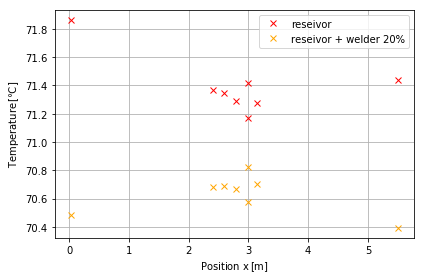

In [117]:
#plt.errorbar(x_pos_TPt100_new, without_heating, fmt='x', color='red', ecolor='lightgray', elinewidth=3, capsize=1, label="without_heating")
plt.errorbar(x_pos_TPt100_new, reseivor, fmt='x', color='red', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor")
#plt.errorbar(x_pos_TPt100_new, welder10, fmt='x', color='blue', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor + welder 10%")
plt.errorbar(x_pos_TPt100_new, welder20, fmt='x', color='orange', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor + welder 20%")

plt.grid(True)
plt.legend()
plt.xlabel(r'Position x$\,\mathrm{[m]}$')
plt.ylabel(r'Temperature$\,\mathrm{[℃]}$')

OutPutFig = './x_Tmp01.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

File name: ./x_Tmp02.pdf


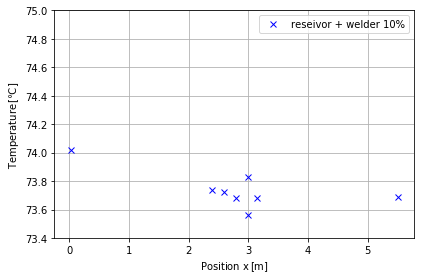

In [118]:
plt.ylim(73.4,75)
plt.errorbar(x_pos_TPt100_new, welder10, fmt='x', color='blue', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor + welder 10%")

plt.grid(True)
plt.legend()
plt.xlabel(r'Position x$\,\mathrm{[m]}$')
plt.ylabel(r'Temperature$\,\mathrm{[℃]}$')

OutPutFig = './x_Tmp02.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

File name: ./x_Tmp03.pdf


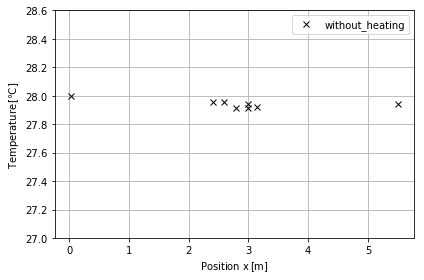

In [119]:
plt.ylim(27.0,28.6)
plt.errorbar(x_pos_TPt100_new, without_heating, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="without_heating")

plt.grid(True)
plt.legend()
plt.xlabel(r'Position x$\,\mathrm{[m]}$')
plt.ylabel(r'Temperature$\,\mathrm{[℃]}$')

OutPutFig = './x_Tmp03.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

In [113]:
print('without heating',data29082019A_ave[2], data29082019A_ave[3])
print('reseivor',data29082019C_ave[2], data29082019C_ave[3])
print('welder10%',data29082019B_ave[2], data29082019B_ave[3])
print('welder20%',data29082019D_ave[2], data29082019D_ave[3])

without heating 27.91936058322065 27.936509784386818
reseivor 71.27737939193318 71.59787763390955
welder10% 73.67783547077431 73.84772636980414
welder20% 70.7061745352141 70.54041770560147


In [111]:
#Tw-Tm
print('without heating',data29082019A_ave[2]-data29082019A_ave[3], rho(data29082019A_ave[2])-rho(data29082019A_ave[3]), mu(data29082019A_ave[2])-mu(data29082019A_ave[3]))
print('reseivor',data29082019C_ave[2]-data29082019C_ave[3], rho(data29082019C_ave[2])-rho(data29082019C_ave[3]), mu(data29082019C_ave[2])-mu(data29082019C_ave[3]))
print('welder10%',data29082019B_ave[2]-data29082019B_ave[3], rho(data29082019B_ave[2])-rho(data29082019B_ave[3]), mu(data29082019B_ave[2])-mu(data29082019B_ave[3]))
print('welder20%',data29082019D_ave[2]-data29082019D_ave[3], rho(data29082019D_ave[2])-rho(data29082019D_ave[3]), mu(data29082019D_ave[2])-mu(data29082019D_ave[3]))

without heating -0.01714920116616625 0.011318472769744403 2.2570159387935544e-06
reseivor -0.32049824197636667 0.211528839704215 6.543443002927224e-06
welder10% -0.16989089902982357 0.11212799335976342 3.223994334164166e-06
welder20% 0.16575682961263283 -0.10939950754436722 -3.473508716930274e-06


### The aim of this code is to compare experimental data with empirical corrrelation suggested by Gnienlinski and Konakov.
\
Shadwed error bar->
Ref. https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

In [80]:
Re_lam = np.linspace(1,2300,)
Re_turb = np.linspace(2300,10000,)
#Skin friction for laminar flow
Cf_lam = 16 / Re_lam
#Skin friction for turbulent flow
Cf_Konakov =  0.25 * (1.8*np.log10(Re_turb) - 1.5)**(-2) #3000 < Re < 5*10^5, Eq(4.17) German literature!!!!
Cf_Petukhov =  0.25 * (1.8*np.log10(Re_turb) - 1.64)**(-2) #3000 < Re < 5*10^5, Eq(8.21) 違う！！！！

File name: ./recf_cf.pdf


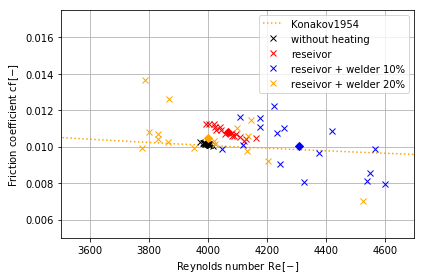

In [81]:
plt.xlim(3500,4700)
plt.ylim(0.005,0.0175)
#plt.plot(Re_lam, Cf_lam, color='blue',linestyle="dotted", label='laminar Poiseuille flow')
plt.plot(Re_turb, Cf_Konakov, color='orange',linestyle="dotted", label="Konakov1954")

plt.errorbar(Re_m_29082019A_list, cf_M_29082019A_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="without heating")
plt.errorbar(data29082019A_ave[6], data29082019A_ave[12], fmt='D', color='black', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_29082019C_list, cf_M_29082019C_list, fmt='x', color='red', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor")
plt.errorbar(data29082019C_ave[6], data29082019C_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_29082019B_list, cf_M_29082019B_list, fmt='x', color='blue', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor + welder 10%")
plt.errorbar(data29082019B_ave[6], data29082019B_ave[12], fmt='D', color='blue', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_29082019D_list, cf_M_29082019D_list, fmt='x', color='orange', ecolor='lightgray', elinewidth=3, capsize=1, label="reseivor + welder 20%")
plt.errorbar(data29082019D_ave[6], data29082019D_ave[12], fmt='D', color='orange', ecolor='lightgray', elinewidth=3, capsize=1)



#plt.errorbar(Re_m_list, cf_M_list, delta_cf_M_list, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement")

plt.grid(True)
plt.legend()
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Friction coefficient cf$\,\mathrm{[-]}$')

OutPutFig = './recf_cf.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

##### Standard deviation
https://qiita.com/0329maromaro/items/761149f84e3f94343ad6

https://it-engineer-lab.com/archives/1065

In [ ]:
def calculate_mean(data):
    s = sum(data)
    N = len(data)
    mean =s/N
    return mean

#平均からの偏差を求める
def find_difference(data):
    mean = calculate_mean(data)
    diff = []
    for num in data:
        diff.append(num-mean)
    return diff

def calculate_variance(data):
    diff = find_difference(data)
    #差の２乗を求める
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)
    #分散を求める
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(data)
    return variance

In [ ]:
variance = calculate_variance(cf_M_29082019B_list)
std = variance**0.5
print(std)

#### Vary with Flow rate

| condition              | Re_sd | Cf_sd    | Cf_sd / Re_sd | Samples |
|------------------------|-------|----------|---------------|---------|
| without heating        | 16.2  | 8.30E-5  | 5.1E-6        | 4       |
| reservoir              | 44.6  | 3.12E-4  | 7.0E-6        | 8       |
| reservoir + welder 10% | 95.3  | 1.32E-3  | 1.4E-5        | 16      |
| reservoir + welder 20% | 70.4  | 9.87E-4  | 1.4E-5        | 16      |
| pr10                   | 113   | 1.28E-3  | 1.1E-5        | 9       |

#### Keep constant flow rate

| condition              | Re_sd | Cf_sd    | Cf_sd / Re_sd | Mass Flow |delta T  |delta rho|delta mu | Samples |
|------------------------|-------|----------|---------------|-----------|---------|---------|---------|---------|
| without heating        | 11.2  | 5.70E-5  | 5.1E-5        | 0.1337    | -0.017  |  0.011  | 2.3E-6  | 16      |
| reservoir              | 47.6  | 3.05E-4  | 6.4E-6        | 0.0452    | -0.320  |  0.210  | 6.5E-3  | 16      |
| reservoir + welder 10% | 173   | 1.33E-3  | 7.7E-6        | 0.0461    | -0.170  |  0.110  | 3.2E-6  | 16      |
| reservoir + welder 20% | 196   | 1.39E-3  | 7.1E-6        | 0.0452    |  0.166  | -0.110  |-3.5E-6  | 16      |

In [ ]:
1.39E-3/196